In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import itertools

# Problem 1

In [2]:
# Реализую произвольную m,n, верхнетреугольную и симметричную. Остальное на вас - вам нужно дописать функцию.
# Не забудьте откомментировать ваши изменения в документации к функции!

import numpy as np

def matrix_generate(rows, columns, type_ = "full", eps = 0):
    """
    matrix_generate(rows, columns, type_ = "full")

    Создаёт случайную матрицу выбранного типа.

    Если матрицу нужных размеров создать нельзя должен выдать
    строку f"Error with type {type_} and shape ({rows},{columns})".

    Parameters
    ----------

    rows : int
        Количество строк в создаваемой матрице.
    columns : int
        Количество столбцов в создаваемой матрице.
    type_ : str, optional
        Тип создаваемой матрицы: "full", "upper_triangular", "symmetric" и т.д.
    eps: float, optional
        Дополнительное число, использующееся при генерации для некоторых типов матриц.

    Returns
    -------
    out : ndarray or str
        Выдаёт матрицу нужного типа либо ошибку.

    Notes
    -----
    Поддерживаемые типы матриц:
        "full","diagonal","upper_triangular","lower_triangulation",
        "symmetric","degenerate","step","perturbation"

    """

    A = None

    if type_ == "full":

        A = np.random.random(size=(rows, columns))

    elif type_ == "diagonal":

        if rows != columns:
            return f"Error with type {type_} and shape ({rows},{columns})"

        else:
        
            A = np.random.random(size=(rows, columns)) * np.eye(rows)

    elif type_ == "upper_triangular":

        A = np.triu(np.random.random(size=(rows, columns)))

    elif type_ == "lower_triangular":

        A = np.tril(np.random.random(size=(rows, columns)))

    elif type_ == "symmetric":

        if rows != columns:
            return f"Error with type {type_} and shape ({rows},{columns})"

        else:

            A = np.random.random(size=(rows, columns))
            A = np.triu(A) + np.triu(A, 1).T

    elif type_ == "degenerate":

        if rows != columns:
            return f"Error with type {type_} and shape ({rows},{columns})"

        else:

            A = np.random.random(size=(rows, columns - 1))
            B = np.random.random(size=(rows - 1, columns))
            A = A @ B

    elif type_ == "step":

        if rows < columns:
            return f"Error with type {type_} and shape ({rows},{columns})"

        else:

            A = np.triu(np.random.random((rows, rows)), 1) + np.eye(rows)
            indices = list(range(rows))
            np.random.shuffle(indices)
            A = np.delete(A, indices[:rows - columns], axis=0)
            A = np.concatenate((A, np.zeros((rows - columns, rows))), axis=0)

    elif type_ == "perturbation":

        A = np.random.uniform(-eps, eps, size=(rows, columns))

    return A

In [3]:
matrix_generate(1, 3)

array([[0.30457066, 0.34572929, 0.01101198]])

In [4]:
matrix_generate(4, 4, type_ = "upper_triangular")

array([[0.31615138, 0.68061697, 0.34437603, 0.50793174],
       [0.        , 0.03642237, 0.38421533, 0.04946769],
       [0.        , 0.        , 0.07736722, 0.87783467],
       [0.        , 0.        , 0.        , 0.74304887]])

In [5]:
matrix_generate(4, 3, type_ = "upper_triangular")

array([[0.61429716, 0.58062905, 0.20908134],
       [0.        , 0.00331656, 0.56781641],
       [0.        , 0.        , 0.66926465],
       [0.        , 0.        , 0.        ]])

In [6]:
matrix_generate(4, 4, type_ = "lower_triangular")

array([[0.61712748, 0.        , 0.        , 0.        ],
       [0.13091057, 0.47199535, 0.        , 0.        ],
       [0.44736078, 0.13757738, 0.11064416, 0.        ],
       [0.46532976, 0.37207999, 0.80871201, 0.98222524]])

In [7]:
matrix_generate(4, 3, type_ = "lower_triangular")

array([[0.8634245 , 0.        , 0.        ],
       [0.68554658, 0.27276342, 0.        ],
       [0.47171492, 0.59031793, 0.9158175 ],
       [0.88043066, 0.58864058, 0.40149404]])

In [8]:
matrix_generate(4, 4, type_ = "symmetric")

array([[0.18327508, 0.6127774 , 0.24782342, 0.3956925 ],
       [0.6127774 , 0.39933971, 0.31742463, 0.1059483 ],
       [0.24782342, 0.31742463, 0.64985609, 0.78993736],
       [0.3956925 , 0.1059483 , 0.78993736, 0.78243694]])

In [9]:
matrix_generate(4, 1, type_ = "symmetric")

'Error with type symmetric and shape (4,1)'

In [10]:
matrix_generate(4, 4, type_ = "diagonal")

array([[0.77271316, 0.        , 0.        , 0.        ],
       [0.        , 0.74439864, 0.        , 0.        ],
       [0.        , 0.        , 0.07898522, 0.        ],
       [0.        , 0.        , 0.        , 0.27484954]])

In [11]:
matrix_generate(4, 1, type_ = "diagonal")

'Error with type diagonal and shape (4,1)'

In [12]:
A = matrix_generate(4, 4, type_ = "degenerate")

A, np.linalg.det(A)

(array([[1.68267532, 1.75536175, 1.58335835, 1.95419693],
        [1.48746614, 1.49159562, 1.07817673, 1.50885609],
        [1.44649873, 1.43617216, 0.9415128 , 1.4687087 ],
        [1.34480151, 1.4047224 , 1.28408842, 1.55274982]]),
 -1.088298984652063e-17)

In [13]:
matrix_generate(4, 1, type_ = "degenerate")

'Error with type degenerate and shape (4,1)'

In [14]:
matrix_generate(4, 2, type_ = "step")

array([[1.        , 0.41606713, 0.36227413, 0.09077771],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [15]:
matrix_generate(2, 4, type_ = "step")

'Error with type step and shape (2,4)'

In [16]:
matrix_generate(4, 3, type_ = "perturbation", eps = 0.01)

array([[ 0.00420732,  0.00314262, -0.00148425],
       [ 0.00547324, -0.00036734,  0.00488417],
       [-0.00571269,  0.00319853,  0.00843291],
       [ 0.00996022, -0.00589095, -0.00467333]])

По какой норме искать максимум?

Про вероятности: вырожденные матрицы составляют во множестве невырожденных меру нуль. Поэтому в случаях, когда матрица может быть невырожденной, она будет таковой с вероятностью 1. Или что значит посчитать численно?

(array([  1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   2.,   1.,   1.,
          3.,   3.,   3.,   9.,  14.,   9.,  17.,  26.,  25.,  20.,  35.,
         53.,  40.,  53.,  68.,  69.,  77.,  86., 100., 121., 142., 155.,
        143., 152., 185., 204., 211., 252., 245., 245., 276., 329., 302.,
        280., 347., 316., 303., 333., 286., 300., 295., 305., 247., 262.,
        263., 224., 231., 204., 229., 203., 177., 163., 138., 150., 125.,
        112.,  79.,  79.,  89.,  74.,  80.,  47.,  64.,  39.,  34.,  34.,
         28.,  27.,  17.,  18.,  20.,  18.,  10.,  14.,   7.,  14.,   3.,
          5.,   5.,   5.,   3.,   1.,   5.,   1.,   3.,   1.,   1.,   0.,
          3.]),
 array([0.0268579 , 0.02970184, 0.03254578, 0.03538972, 0.03823366,
        0.0410776 , 0.04392154, 0.04676548, 0.04960942, 0.05245335,
        0.05529729, 0.05814123, 0.06098517, 0.06382911, 0.06667305,
        0.06951699, 0.07236093, 0.07520487, 0.07804881, 0.08089275,
        0.08373669, 0.08658063, 0.08942457, 0.

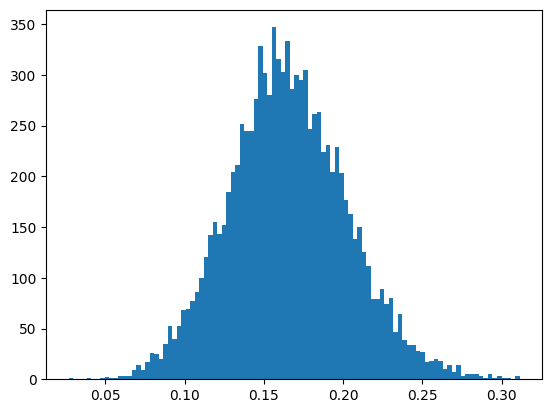

In [17]:
max_eigs = []

for i in range(10000):
    A = matrix_generate(10, 10, type_ = "perturbation", eps = 0.1)
    max_eigs.append(abs(max(scipy.linalg.eigvals(A))))

plt.hist(max_eigs, bins=100)

# Problem 2

In [18]:
def max_norm(x):
    ans = 0
    for i in x:
        ans = max(ans, abs(i))
    return ans

def L1_norm(x):
    ans = 0
    for i in x:
        ans += abs(i)
    return ans

def L2_norm(x):
    ans = 0
    for i in x:
        ans += i ** 2
    return ans ** 0.5

In [19]:
def mat_max_norm(A):
    ans = 0
    for i in A:
        ans_i = 0
        for j in i:
            ans_i += abs(j)
        ans = max(ans, ans_i)
    return ans

def mat_L1_norm(A):
    return mat_max_norm(A.T)

def mat_L2_norm(A):
    eigs = scipy.linalg.eigvals(A.T @ A)
    return max(eigs) ** 0.5

In [20]:
def cond_num(A, norm="L1"):
    if norm == "L1":
        A1 = np.linalg.matrix_power(A, -1)
        return mat_L1_norm(A1) * mat_L1_norm(A)

    elif norm == "L2":
        return (max(scipy.linalg.eigvals(A.T @ A)) / min(scipy.linalg.eigvals(A.T @ A))) ** 0.5

    elif norm == "max":
        return cond_num(A.T)

In [21]:
def func(A, f, norm="L1"):
    A1 = np.linalg.matrix_power(A, -1)
    if norm == "L1":
        return (mat_L1_norm(A1) * L1_norm(f) / L1_norm(A1 @ f)) ** (-1)

    elif norm == "L2":
        return mat_L2_norm(A1) * L2_norm(f) / L2_norm(A1 @ f)

    elif norm == "max":
        return mat_max_norm(A1) * max_norm(f) / max_norm(A1 @ f)

def normize(f, norm="L1"):
    if norm == "L1":
        return f / L1_norm(f)

    elif norm == "L2":
        return f / L2_norm(f)

    elif norm == "max":
        return f / max_norm(f)

def cond_num_approx(A, norm="L1"):
    eps = 0.000001
    h = 0.0001
    dist_prev = 1

    n = len(A)
    f = normize(np.random.random(size=(n, 1)), norm)
    
    while (dist_prev > eps):
        grad = []
        for i in range(n):
            f_p = f.copy()
            f_m = f.copy()

            f_p[i] += h
            f_m[i] -= h

            grad.append((func(A, f_p, norm) - func(A, f_m, norm)) / (2 * h))

        f_old = f.copy()
        f -= np.asarray(grad) * 0.0001
        f = normize(f)

        if norm == "L1":
            dist_prev = L1_norm(f - f_old)

        elif norm == "L2":
            dist_prev = L2_norm(f - f_old)

        elif norm == "max":
            dist_prev = max_norm(f - f_old)

        print(func(A, f))

    return func(A, f)

In [22]:
A = matrix_generate(5, 5, type_ = "full")

# test of convergence to actual conditional number
# 1 / cond_num_approx(A), cond_num(A)

# Problem 3

n - размерность пространства. $$ \frac{1}{\sqrt{n}} ||\mathbf{x}||_2 \leq ||\mathbf{x}||_1 \leq n ||\mathbf{x}||_2 $$

# Problem 4

1. $$ ||x||_2 = \sqrt{\sum\limits_{i = 1}^{m} x_i^2} \leq \sqrt{m \cdot (\max\limits_{i} x_i)^2} = \sqrt{m} \cdot \max\limits_{i} x_i = \sqrt{m} \cdot ||x||_{\infty} $$
Пример равенства: $ x = (1, 1, \dots, 1) \in \mathbb{R}^m $.

2. Здесь $ e = (1, 1, \dots, 1) \in \mathbb{R}^n $ $$ ||A||_{\infty} = \max\limits_{i} \sum\limits_{j} |a_{ij}| = ||Ae||_{\infty} \leq ||Ae||_2 \leq ||A||_2 ||e||_2 = \sqrt{n} \cdot ||A||_2 $$
Пример равенства: матрица, в которой $ a_{11} = 1 $, а все остальные элементы равны $ 0 $. 

# Problem 5

Без ограничения общности рассмотрим домножение на $U$ слева. Матрицу $A$ рассмотрим по столбцам. Квадрат нормы Фробениуса равен сумме квадратов длин векторов, которые задаются столбцами $A$. При домножении $A$ на $U$ длины этих векторов не меняются в силу унитарности $U$. Поэтому и квадраты длин не меняются, значит сохраняется и квадрат нормы Фробениуса.

# Problem 6*

In [23]:
c = 5

In [24]:
# Generate some data
np.random.seed(42)
lambda1 = np.random.normal(size=(c, c))
lambda2 = np.random.normal(size=(c, c))
lambda3 = np.random.normal(size=(c, c))
G1 = np.random.normal(size=(c, c, c))
G2 = np.random.normal(size=(c, c, c))
U = np.random.normal(size=(c, c, c, c))

In [25]:
out = np.einsum_path("ab,cbd,de,feg,gh,ijcf->ahij", lambda1, G1, lambda2, G2, lambda3, U, optimize='optimal')

print(out[0], out[1])

['einsum_path', (0, 1), (0, 1), (0, 3), (1, 2), (0, 1)]   Complete contraction:  ab,cbd,de,feg,gh,ijcf->ahij
         Naive scaling:  10
     Optimized scaling:  6
      Naive FLOP count:  5.859e+07
  Optimized FLOP count:  4.125e+04
   Theoretical speedup:  1420.420
  Largest intermediate:  6.250e+02 elements
--------------------------------------------------------------------------
scaling                  current                                remaining
--------------------------------------------------------------------------
   4                 cbd,ab->acd                 de,feg,gh,ijcf,acd->ahij
   4                 feg,de->dfg                    gh,ijcf,acd,dfg->ahij
   4                 dfg,gh->dfh                       ijcf,acd,dfh->ahij
   5               dfh,acd->acfh                          ijcf,acfh->ahij
   6             acfh,ijcf->ahij                               ahij->ahij


In [26]:
def Z_naive(lambda1, lambda2, lambda3, G1, G2, U):
    c = lambda1.shape[0]
    Z = np.zeros(shape=(c, c, c, c))
    for a, b, c, d, e, f, g, h, i, j in itertools.product(*([range(c)]*10)):
        Z[a, h, i, j] += lambda1[a, b]*lambda2[d, e]*lambda3[g, h]*G1[c, b, d]*G2[f, e, g]*U[i, j, c, f]
    return Z

In [27]:
def Z_optimal(lambda1, lambda2, lambda3, G1, G2, U):
    c = lambda1.shape[0]

    lG1 = np.tensordot(G1, lambda1, axes = ([1], [1]))
    lG2 = np.tensordot(G2, lambda2, axes = ([1], [1]))
    lG3 = np.tensordot(lG2, lambda3, axes = ([2], [0]))
    GG = np.tensordot(lG3, lG1, axes = ([0], [2]))
    Z = np.tensordot(GG, U, axes = ([1, 2], [2, 3]))
    
    return Z

In [28]:
%%timeit
Z = Z_naive(lambda1, lambda2, lambda3, G1, G2, U)

7.9 s ± 297 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
%%timeit
Z = Z_optimal(lambda1, lambda2, lambda3, G1, G2, U)

35.1 µs ± 1.18 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [30]:
%%timeit
Z = np.einsum("ab,cbd,de,feg,gh,ijcf->ahij", lambda1, G1, lambda2, G2, lambda3, U, optimize='optimal')

664 µs ± 2.93 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Для Z_optimal требуется $ \chi^6 $ операций.